# Example

In [1]:
import os
import sys

BASE_PATH = os.path.abspath(os.pardir)
DATA_PATH = os.path.join(BASE_PATH, 'examples/data/cheetah_bacteria')
MODEL_PATH = os.path.join(DATA_PATH, 'unet_params')
TEST_PATH = os.path.join(DATA_PATH, 'tests')

sys.path.append(BASE_PATH)

## Train the U-Net.

In [2]:
from senso.train import train

In [3]:
train(MODEL_PATH, DATA_PATH, 50, 1, 1e-4)

Epoch 1
-------------------------------
loss: 1.080144  [    0/   60]
loss: 0.933495  [    1/   60]
loss: 0.892129  [    2/   60]
loss: 0.864404  [    3/   60]
loss: 0.895208  [    4/   60]
loss: 0.829678  [    5/   60]
loss: 0.812599  [    6/   60]
loss: 0.839519  [    7/   60]
loss: 0.806419  [    8/   60]
loss: 0.800765  [    9/   60]
loss: 0.788579  [   10/   60]
loss: 0.777470  [   11/   60]
loss: 0.779928  [   12/   60]
loss: 0.780518  [   13/   60]
loss: 0.766911  [   14/   60]
loss: 0.764470  [   15/   60]
loss: 0.772788  [   16/   60]
loss: 0.775709  [   17/   60]
loss: 0.762624  [   18/   60]
loss: 0.763240  [   19/   60]
loss: 0.763081  [   20/   60]
loss: 0.752640  [   21/   60]
loss: 0.780752  [   22/   60]
loss: 0.767392  [   23/   60]
loss: 0.763871  [   24/   60]
loss: 0.756228  [   25/   60]
loss: 0.798888  [   26/   60]
loss: 0.748855  [   27/   60]
loss: 0.768813  [   28/   60]
loss: 0.742382  [   29/   60]
loss: 0.784849  [   30/   60]
loss: 0.748247  [   31/   60]


# Validate the trained U-Net

In [3]:
from senso.predict import predict

Show the test image.

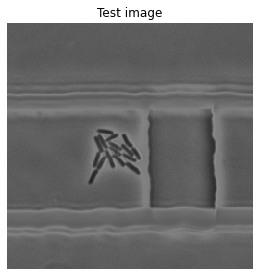

In [4]:
from skimage import io, img_as_ubyte
from matplotlib import pyplot as plt

im = io.imread(os.path.join(TEST_PATH, 'test_image.tif'))

io.imshow(im)
plt.axis('off')
plt.title('Test image')
plt.show()

Evaluate the test image using the trained U-Net.

In [5]:
pred = predict(MODEL_PATH, TEST_PATH, 'test_image.tif')
pred = pred.squeeze(0)

Show and check the background mask.

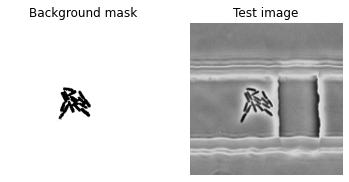

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].imshow(pred[0,:,:].numpy(), cmap='gray')
ax[0].axis('off')
ax[0].set_title('Background mask')

ax[1].imshow(im, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Test image')

plt.show()

Show the filtered background image.

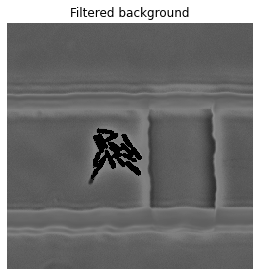

In [7]:
im_back = im * (pred[0,:,:].numpy() > 0.3)

io.imshow(im_back, cmap='gray')
plt.axis('off')
plt.title('Filtered background')
plt.show()

Show and check the cell contour mask.

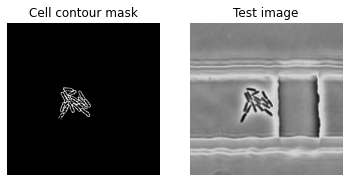

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].imshow(pred[1,:,:].numpy(), cmap='gray')
ax[0].axis('off')
ax[0].set_title('Cell contour mask')

ax[1].imshow(im, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Test image')

plt.show()

Show the filtered cell contour image.

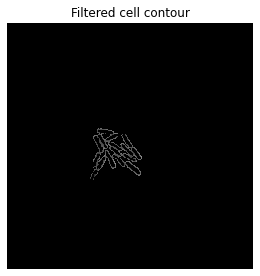

In [9]:
im_contour = im * (pred[1,:,:].numpy() > 0.3)

io.imshow(im_contour, cmap='gray')
plt.axis('off')
plt.title('Filtered cell contour')
plt.show()

Show and check the cell mask.

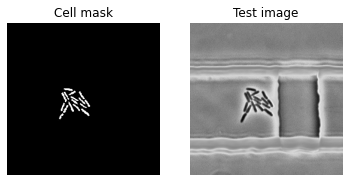

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].imshow(pred[2,:,:].numpy(), cmap='gray')
ax[0].axis('off')
ax[0].set_title('Cell mask')

ax[1].imshow(im, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Test image')

plt.show()

Show the filtered cell image.

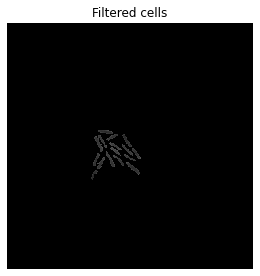

In [11]:
im_cell = im * (pred[2,:,:].numpy() > 0.3)

io.imshow(im_cell, cmap='gray')
plt.axis('off')
plt.title('Filtered cells')
plt.show()